In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os


### read dataset

In [2]:
df_ibm= pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df_ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# **Exploratory Data Analysis**¶¶


In [4]:
df_ibm.shape

(1470, 35)

In [5]:
df_ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df_ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df_ibm[['Age']].value_counts().sort_values(ascending=False)  

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
37     50
27     48
28     48
42     46
39     42
45     41
41     40
26     39
44     33
46     33
43     32
50     30
24     26
25     26
47     24
49     24
55     22
53     19
48     19
51     19
52     18
54     18
22     16
56     14
23     14
58     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
dtype: int64

### so the most ages works in company is 35 years old

In [8]:
print(df_ibm.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df_ibm.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### so we do this analysis based on Attreation so we convert Attration into dummy variable

In [10]:
dummy_variable_1 = pd.get_dummies(df_ibm["Attrition"])
dummy_variable_1.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
dummy_variable_1.rename(columns={'No':'Attrition_No', 'Yes':'Attrition_Yes'}, inplace=True)
dummy_variable_1.head()

,Attrition_No,Attrition_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


### add new dummy variable into our original dataframe

In [12]:
df_ibm = pd.concat([df_ibm, dummy_variable_1], axis=1)

df_ibm.drop("Attrition", axis = 1, inplace=True)

In [13]:
df_ibm.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,0,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,1,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,1,0


In [14]:
df_ibm.groupby('Department')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Attrition_Yes, dtype: float64

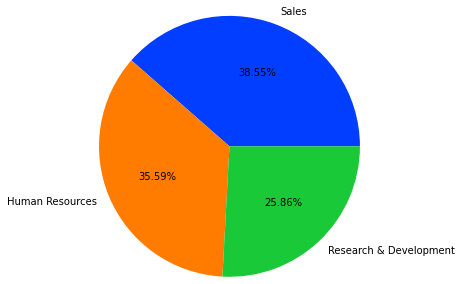

In [15]:
exp_val=[0.206278,0.190476,0.138398]
exp_label=['Sales','Human Resources','Research & Development']
palette_color = sns.color_palette('bright')
plt.pie(exp_val,labels=exp_label,radius=1.5,colors=palette_color,autopct='%0.2f%%');

### so the **sales department** is the most attration department

In [16]:
df_ibm.groupby('BusinessTravel')['Age'].agg(len).sort_values(ascending=False)


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Age, dtype: int64

### and the most employees in this company travel_Rarely

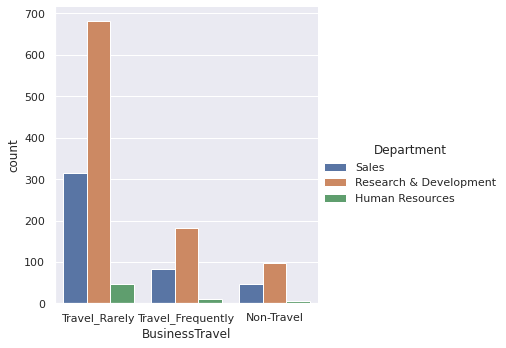

In [17]:
sns.set(rc={'figure.figsize':(18,10)})
plot=sns.catplot(x='BusinessTravel',hue='Department',kind='count',data=df_ibm)


In [18]:
df_ibm.groupby('EducationField')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


EducationField
Human Resources     0.259259
Technical Degree    0.242424
Marketing           0.220126
Life Sciences       0.146865
Medical             0.135776
Other               0.134146
Name: Attrition_Yes, dtype: float64

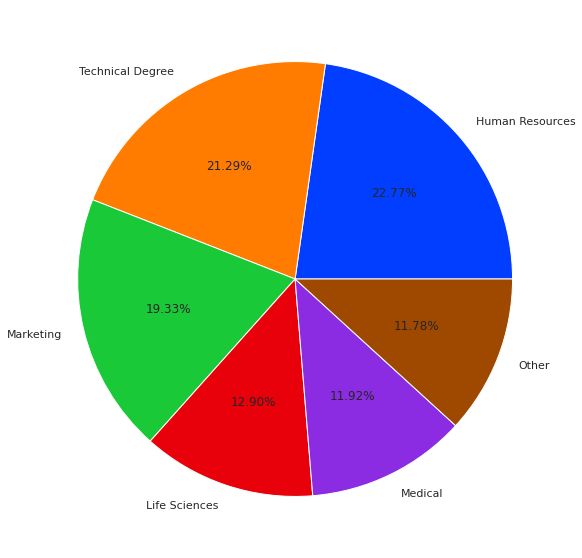

In [19]:
exp_val=[0.259259,0.242424,0.220126,0.146865,0.135776,0.134146]
exp_label=['Human Resources','Technical Degree','Marketing','Life Sciences','Medical','Other']
palette_color = sns.color_palette('bright')
plt.pie(exp_val,labels=exp_label,radius=1,colors=palette_color,autopct='%0.2f%%');

### so the most attration education field is the **human **resources****

In [20]:
df_ibm.groupby('Gender')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


Gender
Male      0.170068
Female    0.147959
Name: Attrition_Yes, dtype: float64

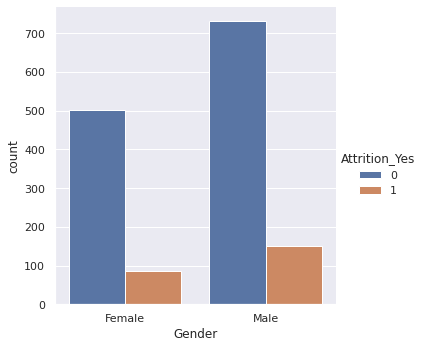

In [21]:
sns.catplot(x='Gender',hue='Attrition_Yes',kind='count',data=df_ibm)

### and males more attration than females

In [22]:
df_ibm.groupby('Education')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


Education
1    0.182353
3    0.173077
2    0.156028
4    0.145729
5    0.104167
Name: Attrition_Yes, dtype: float64

### and people they are Below College is more attration than other

In [23]:
df_ibm.groupby('WorkLifeBalance')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


WorkLifeBalance
1    0.312500
4    0.176471
2    0.168605
3    0.142217
Name: Attrition_Yes, dtype: float64

###  and people they are have bad work life balance is more attration than other

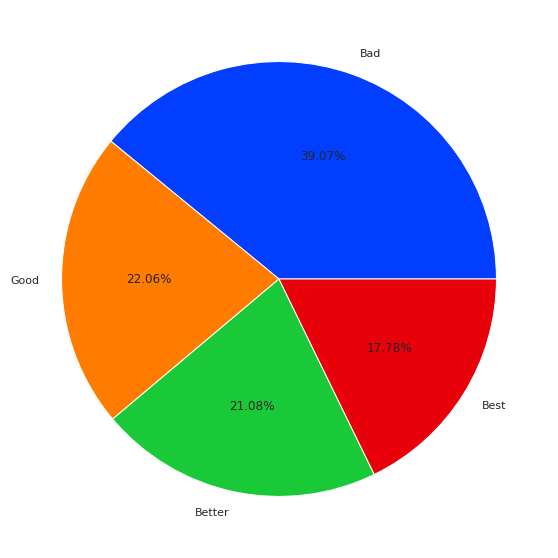

In [24]:
exp_val=[0.312500, 0.176471,0.168605,0.142217]
exp_label=['Bad','Good','Better','Best']
palette_color = sns.color_palette('bright')
plt.pie(exp_val,labels=exp_label,radius=1,colors=palette_color,autopct='%0.2f%%');

In [25]:
df_ibm.groupby('Age')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


Age
19    0.666667
20    0.545455
18    0.500000
21    0.461538
58    0.357143
22    0.312500
26    0.307692
28    0.291667
23    0.285714
24    0.269231
29    0.264706
31    0.260870
25    0.230769
56    0.214286
33    0.206897
44    0.181818
32    0.180328
52    0.166667
50    0.166667
30    0.150000
41    0.150000
39    0.142857
55    0.136364
35    0.128205
47    0.125000
46    0.121212
37    0.120000
34    0.116883
51    0.105263
53    0.105263
48    0.105263
40    0.087719
36    0.086957
49    0.083333
43    0.062500
27    0.062500
45    0.048780
42    0.043478
38    0.034483
54    0.000000
57    0.000000
59    0.000000
60    0.000000
Name: Attrition_Yes, dtype: float64

### and employees the have 19 years old is the most aAttration in this company

In [26]:
df_ibm.groupby('JobLevel')['Attrition_Yes'].agg(np.mean).sort_values(ascending=False)


JobLevel
1    0.263352
3    0.146789
2    0.097378
5    0.072464
4    0.047170
Name: Attrition_Yes, dtype: float64

In [27]:
df_ibm[['PerformanceRating']].nunique()

PerformanceRating    2
dtype: int64

In [28]:
df_ibm[['PerformanceRating']].value_counts().sort_values(ascending=False)  

PerformanceRating
3                    1244
4                     226
dtype: int64

### the most employees in this company have PerformanceRating 3 which is excellent

In [29]:
df_ibm.groupby('PerformanceRating')['JobSatisfaction'].agg(np.mean).sort_values(ascending=False)


PerformanceRating
4    2.734513
3    2.727492
Name: JobSatisfaction, dtype: float64

In [30]:
df_ibm.groupby('BusinessTravel')['JobSatisfaction'].agg(np.mean).sort_values(ascending=False)


BusinessTravel
Non-Travel           2.793333
Travel_Frequently    2.790614
Travel_Rarely        2.702780
Name: JobSatisfaction, dtype: float64

In [31]:
df_ibm.groupby('Age')['JobSatisfaction'].agg(np.mean).sort_values(ascending=False)


Age
57    3.500000
18    3.250000
59    3.200000
43    3.156250
53    2.947368
22    2.937500
47    2.916667
52    2.888889
38    2.844828
48    2.842105
44    2.818182
32    2.803279
37    2.800000
31    2.797101
34    2.792208
51    2.789474
54    2.777778
26    2.769231
24    2.769231
35    2.769231
39    2.761905
29    2.735294
33    2.706897
50    2.700000
30    2.700000
36    2.695652
21    2.692308
25    2.692308
28    2.645833
58    2.642857
55    2.636364
20    2.636364
45    2.634146
40    2.614035
42    2.608696
27    2.604167
19    2.555556
41    2.500000
46    2.454545
23    2.428571
49    2.333333
56    2.285714
60    2.200000
Name: JobSatisfaction, dtype: float64

### and employees they have 57 years have higher job satisfaction in this company

In [32]:
df_ibm[['Education']].value_counts().sort_values(ascending=False)  

Education
3            572
4            398
2            282
1            170
5             48
dtype: int64

### the most employees in this company have an eductional dagree **Bachelor**

In [33]:
df_ibm.groupby('Education')['EnvironmentSatisfaction'].agg(np.mean).sort_values(ascending=False)


Education
3    2.776224
1    2.747059
2    2.716312
5    2.645833
4    2.645729
Name: EnvironmentSatisfaction, dtype: float64